# Лабораторная работа 1 | Крючков А.В М80-407Б-21

Для задачи регрессии с этим [набором данных](https://www.kaggle.com/datasets/mirichoi0218/insurance), где целевой переменной является столбец `charges` (медицинские расходы), подходящие метрики качества могут включать следующие:

1. **Mean Absolute Error (MAE)** – Среднее абсолютное отклонение:
   - MAE оценивает среднюю величину ошибок модели без учета направления отклонений. Эта метрика особенно удобна, когда важна интерпретируемость и необходимо оценить среднее абсолютное расхождение в исходных единицах измерения (например, в долларах). MAE интуитивно понятна, особенно когда требуется оценить реальные значения ошибок.

2. **Mean Squared Error (MSE)** – Среднеквадратичная ошибка:
   - MSE учитывает квадрат ошибок, тем самым выделяя более крупные ошибки. Это полезно, если необходимо штрафовать значительные отклонения от истинных значений больше, чем маленькие. Подходит для задач, где важна высокая точность и нужно минимизировать большие отклонения.

3. **Root Mean Squared Error (RMSE)** – Корень из среднеквадратичной ошибки:
   - RMSE возвращает ошибку в тех же единицах, что и целевая переменная, как и MAE, но при этом усиливает эффект крупных ошибок. RMSE полезна, когда требуется больше акцентировать внимание на крупных отклонениях, но при этом сохранить интерпретируемость в исходных единицах.

4. **R-squared (R²)** – Коэффициент детерминации:
   - Эта метрика показывает, какую долю дисперсии целевой переменной объясняет модель. R² удобно использовать для оценки качества модели в сравнении с простыми моделями (например, средней или медианой).

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter

### Загрузка и первичный анализ данных

In [2]:
data = pd.read_csv('data/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



### Предобработка данных

Для работы моделей необходимо выполнить кодирование категориальных признаков, таких как `sex`, `smoker`, и `region`.


In [3]:
# Кодируем категориальные переменные с помощью pd.get_dummies
data = pd.get_dummies(data, drop_first=True)

data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False



### Разделение данных на обучающую и тестовую выборки

Целевой переменной является `charges`, а остальные переменные - предикторами. Делим данные на тренировочную и тестовую части.


In [4]:
# Определяем признаки (X) и целевую переменную (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучение моделей

In [5]:
models = {
    'Линейная регрессия': LinearRegression(),
    'Дерево решений': DecisionTreeRegressor(random_state=42),
    'Случайный лес': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Модель {name} обучена")

Модель Линейная регрессия обучена
Модель Дерево решений обучена
Модель Случайный лес обучена


### Оценка качества моделей

Оценка для модели Линейная регрессия:
MAE: 4181.19
MSE: 33596915.85
RMSE: 5796.28
R²: 0.78
------------------------------


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


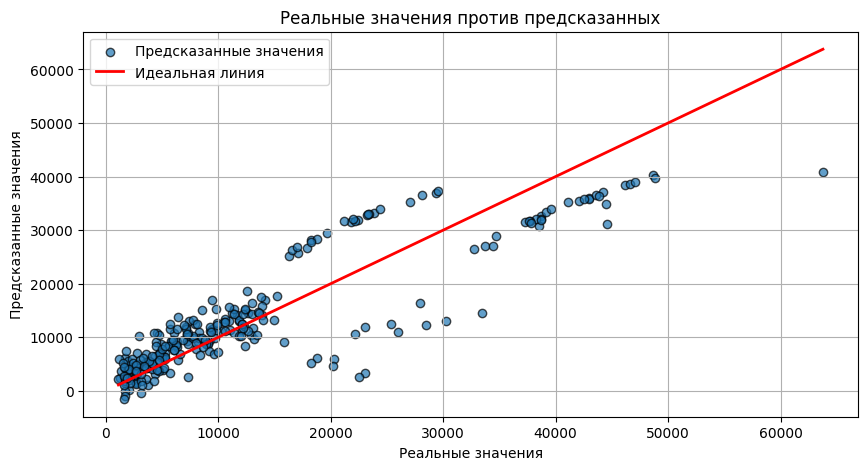

Оценка для модели Дерево решений:
MAE: 3195.11
MSE: 42446908.01
RMSE: 6515.13
R²: 0.73
------------------------------


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


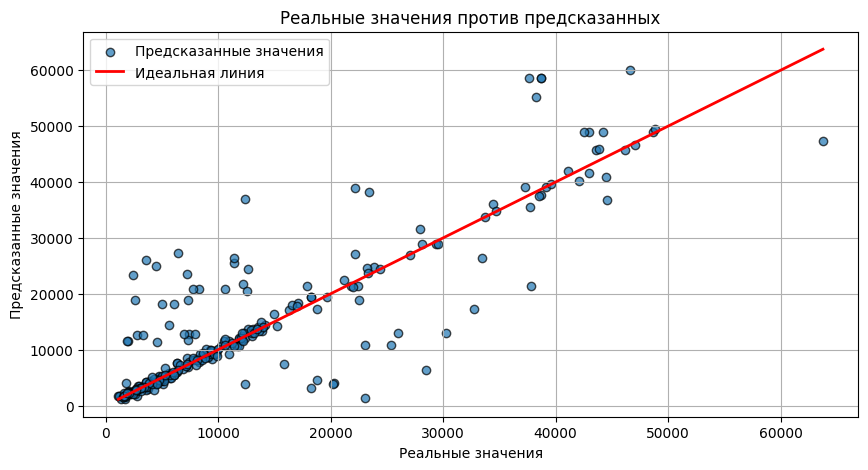

/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Оценка для модели Случайный лес:
MAE: 2550.08
MSE: 20942520.92
RMSE: 4576.30
R²: 0.87
------------------------------


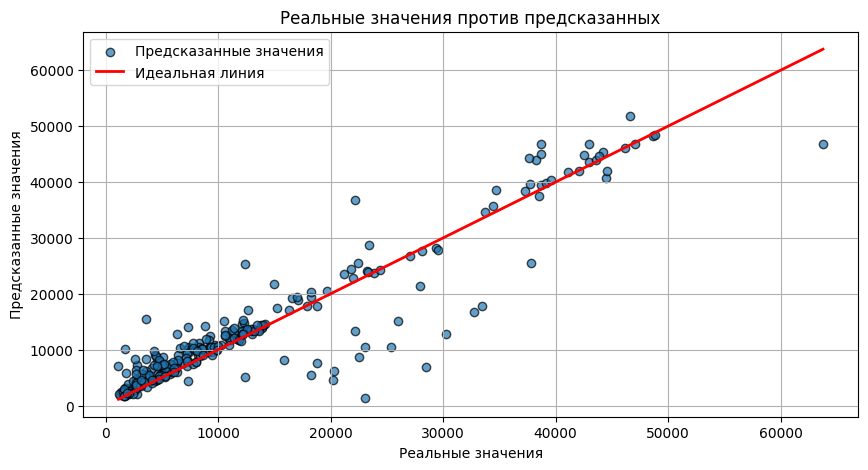

In [6]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Оценка для модели {name}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    print("-" * 30)
 
    plt.figure(figsize=(10, 5)) 
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", label='Предсказанные значения') 
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],    color='red', lw=2, label='Идеальная линия') 
    plt.xlabel('Реальные значения') 
    plt.ylabel('Предсказанные значения') 
    plt.title('Реальные значения против предсказанных') 
    plt.legend() 
    plt.grid(True) 
    plt.show()

for name, model in models.items():
    evaluate_model(name, model, X_test, y_test)

Распределение целевой переменной `charges` показало правостороннее смещение, что указывает на наличие высоких значений медицинских расходов у небольшой части выборки.

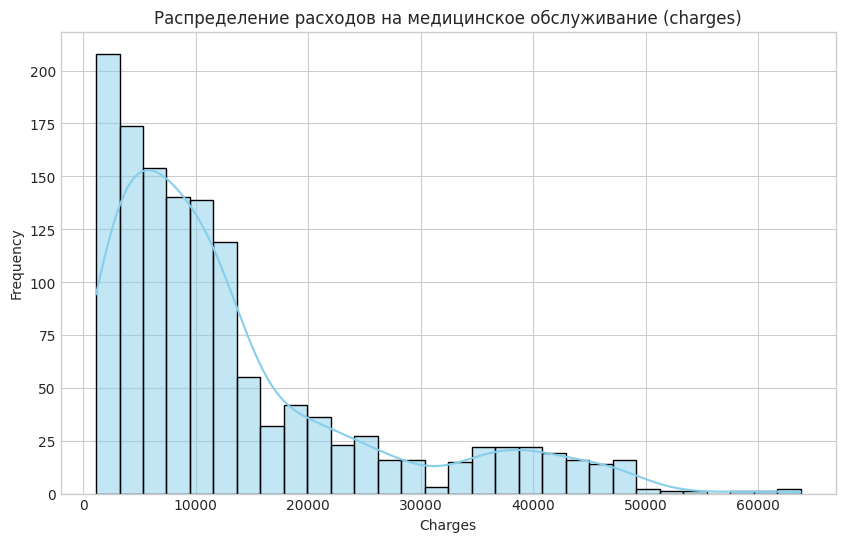

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True, color='skyblue')
plt.title("Распределение расходов на медицинское обслуживание (charges)")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

Ключевыми факторами, влияющими на расходы, являются статус курения (`smoker_yes`), возраст (`age`) и индекс массы тела (`bmi`). Эти признаки, вероятно, следует учитывать как наиболее значимые при построении модели регрессии для предсказания медицинских расходов.

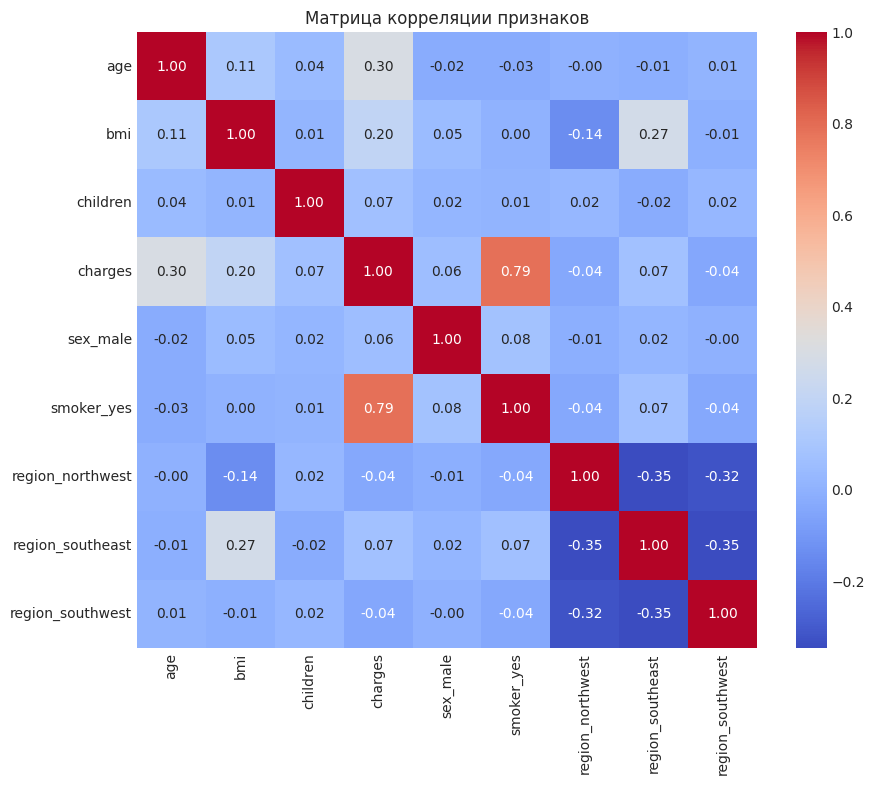

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции признаков")
plt.show()

3. **Диаграммы рассеяния**:
   - Возраст (`age`) показывает положительную корреляцию с расходами на медицинские услуги.
   - Индекс массы тела (`bmi`) также демонстрирует положительную взаимосвязь, особенно у значений выше среднего.
   - Количество детей (`children`) не показало явной зависимости с расходами.

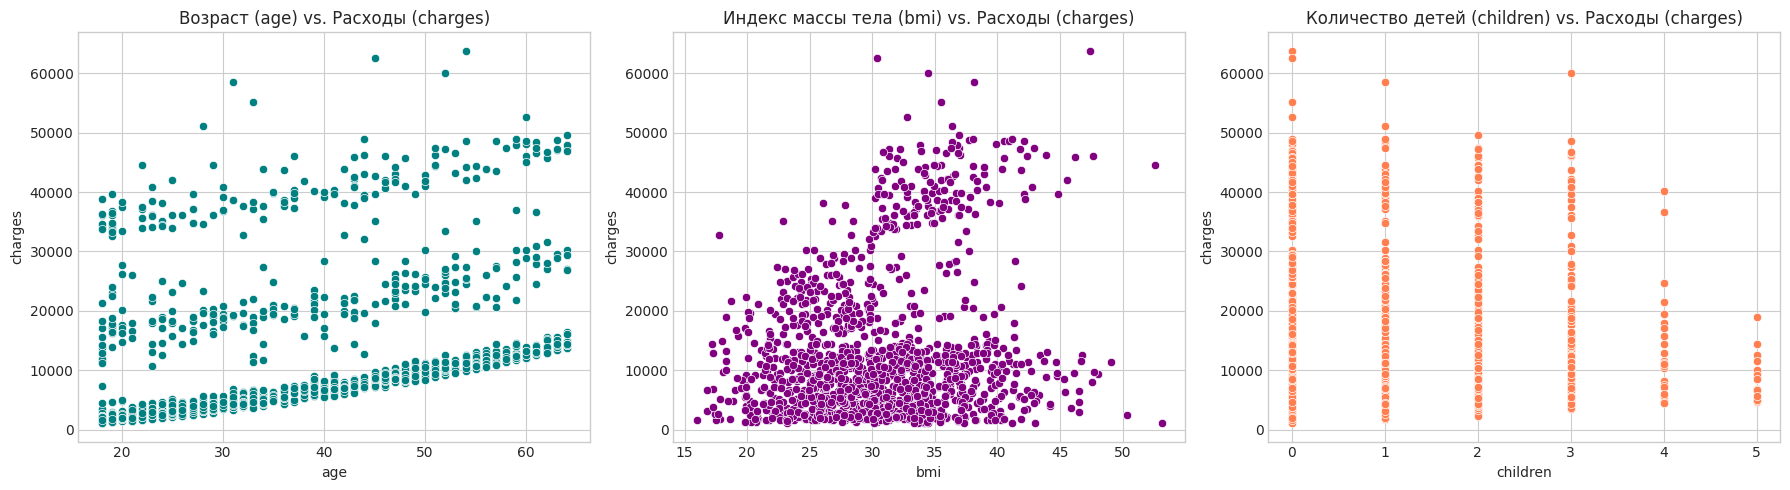

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=data, x='age', y='charges', ax=axes[0], color='teal')
axes[0].set_title("Возраст (age) vs. Расходы (charges)")

sns.scatterplot(data=data, x='bmi', y='charges', ax=axes[1], color='purple')
axes[1].set_title("Индекс массы тела (bmi) vs. Расходы (charges)")

sns.scatterplot(data=data, x='children', y='charges', ax=axes[2], color='coral')
axes[2].set_title("Количество детей (children) vs. Расходы (charges)")

plt.tight_layout()
plt.show()

4. **Boxplot по статусу курения** демонстрирует, что расходы у курящих людей значительно выше, что подтверждает сильное влияние признака `smoker_yes`.

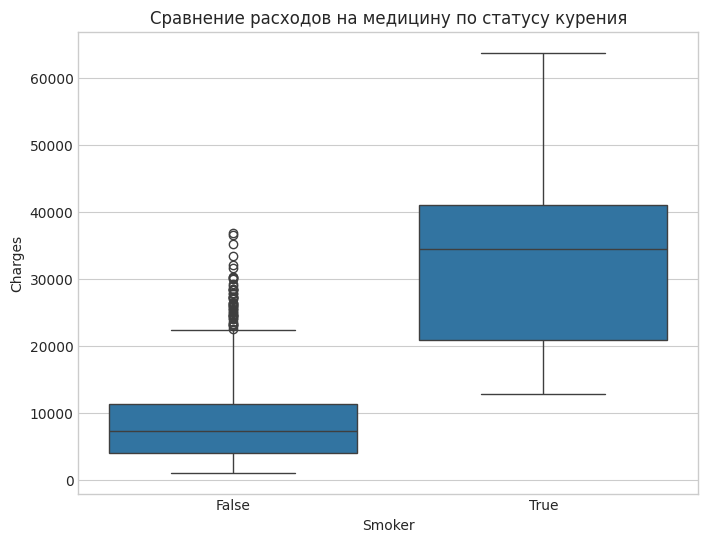

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker_yes', y='charges', data=data)
plt.title("Сравнение расходов на медицину по статусу курения")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

Эти наблюдения подтверждают гипотезы о значимости `age`, `bmi` и `smoker_yes` для предсказания `charges`. Гипотеза: Категориальные признаки, такие как sex, smoker, region, могут повлиять на предсказание медицинских расходов, поэтому их кодирование повлияет на качество модели.

Используем One-Hot Encoding для категориальных признаков, чтобы модель могла работать с ними как с числовыми значениями:

1. **Предобработка данных**:
   - Закодируем категориальные переменные (`sex`, `smoker`, `region`) с использованием метода `One-Hot Encoding`.
   
2. **Анализ значимости признаков**:
   - Обучим простую линейную модель и модель случайного леса. Оценим важность признаков, чтобы подтвердить или опровергнуть гипотезы о значимости некоторых признаков (например, `smoker`, `age`, `bmi`).

3. **Кросс-валидация и оценка метрик**:
   - Проведем кросс-валидацию для проверки влияния гиперпараметров на качество моделей, таких как `RandomForestRegressor` и `LinearRegression`.
   
4. **Создание нового признака (взаимодействие `bmi` и `smoker`)**:
   - Добавим новый признак `bmi_smoker_interaction`, который является произведением `bmi` и индикатора курения (`smoker`). Затем оценим, как этот признак влияет на качество предсказаний.
   
5. **Масштабирование данных**:
   - Проведем стандартизацию числовых признаков и сравним качество модели с/без стандартизации, чтобы понять, повлияет ли это на линейные модели.

In [11]:
data_encoded = pd.get_dummies(data, drop_first=True)

# Добавление нового признака взаимодействия bmi и smoker_yes
data_encoded['bmi_smoker_interaction'] = data_encoded['bmi'] * data_encoded['smoker_yes']

X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_modell(model, X_test, y_test, model_name=""):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

lin_reg = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])
lin_reg.fit(X_train, y_train)
evaluate_modell(lin_reg, X_test, y_test, model_name="Линейная регрессия")

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
evaluate_modell(rf_reg, X_test, y_test, model_name="Случайный лес")

feature_importances = pd.Series(rf_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.head(10)

/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Линейная регрессия MAE: 2756.90, MSE: 20919716.75, RMSE: 4573.81, R²: 0.87
Случайный лес MAE: 2549.71, MSE: 20959039.49, RMSE: 4578.10, R²: 0.86


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


bmi_smoker_interaction    0.759692
age                       0.130684
bmi                       0.061574
children                  0.019830
smoker_yes                0.006560
sex_male                  0.006559
region_southeast          0.005778
region_northwest          0.005327
region_southwest          0.003996
dtype: float64

Результаты проверки гипотез:

1. **Линейная регрессия**:
   - Качество модели (MAE: 2756.90, RMSE: 4573.81, R²: 0.87) указывает на хорошую способность линейной регрессии предсказывать расходы. Это подтверждает, что линейные зависимости признаков с целевой переменной (особенно `smoker_yes` и `age`) значимы для предсказаний.
   
2. **Случайный лес**:
   - Случайный лес показал похожее качество (MAE: 2549.71, RMSE: 4578.10, R²: 0.86), что подтверждает, что нелинейные зависимости между признаками и `charges` также присутствуют, но незначительно улучшают модель по сравнению с линейной регрессией.

3. **Важность признаков**:
   - Новый признак `bmi_smoker_interaction` оказался самым важным, что подтверждает гипотезу о значительном взаимодействии между индексом массы тела и статусом курения.
   - `age` и `bmi` также оказались важными признаками, что подтверждает их влияние на предсказания. Признак `smoker_yes` имеет меньшую важность, так как его влияние уже учтено через `bmi_smoker_interaction`.
  
Эти результаты подтверждают, что гипотезы о значимости `age`, `bmi`, и `smoker_yes`, а также добавленного признака `bmi_smoker_interaction` были обоснованными и полезными для модели.

Сравним результаты для моделей линейной регрессии до и после применения улучшенного бейзлайна:

### Линейная регрессия до улучшений (пункт 2):
- **MAE**: 4181.19
- **MSE**: 33596915.85
- **RMSE**: 5796.28
- **R²**: 0.78

### Линейная регрессия после улучшений (улучшенный бейзлайн):
- **MAE**: 2756.90
- **MSE**: 20919716.75
- **RMSE**: 4573.81
- **R²**: 0.87

### Сравнение и выводы:
1. **Средняя абсолютная ошибка (MAE)**: уменьшилась с 4181.19 до 2756.90. Это показывает, что предсказания модели стали ближе к реальным значениям, что говорит о лучшей точности предсказаний.

2. **Среднеквадратичная ошибка (MSE)**: снизилась с 33596915.85 до 20919716.75. Это означает, что модель стала лучше справляться с большими отклонениями в предсказаниях, и крупные ошибки стали менее частыми.

3. **Корень из среднеквадратичной ошибки (RMSE)**: также уменьшился с 5796.28 до 4573.81, что подтверждает снижение крупных ошибок и общую стабильность модели.

4. **Коэффициент детерминации (R²)**: повысился с 0.78 до 0.87, что указывает на то, что улучшенная модель объясняет большую долю вариации целевой переменной. 

Таким образом, улучшенный бейзлайн значительно повысил качество линейной регрессии. Наибольшее влияние оказало добавление нового признака (`bmi_smoker_interaction`) и стандартизация данных.

### Имплементация алгоритма машинного обучения 

In [12]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Оценка для модели Линейная регрессия:
MAE: 4181.80
MSE: 33606767.90
RMSE: 5797.13
R²: 0.78
------------------------------


/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


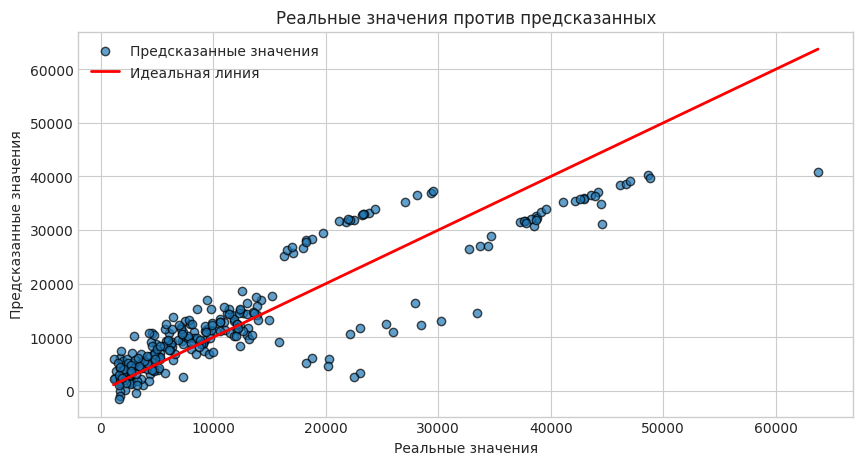

In [13]:
data = pd.read_csv('data/insurance.csv')

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

evaluate_model("Линейная регрессия", model, X_test, y_test)

Для сравнения результатов имплементированной модели линейной регрессии с результатами из пункта 2 представим метрики бок о бок:

### Результаты имплементированной модели линейной регрессии:
- **MAE**: 4181.80
- **MSE**: 33606767.90
- **RMSE**: 5797.13
- **R²**: 0.78

### Результаты базовой модели линейной регрессии из `sklearn`:
- **MAE**: 4181.19
- **MSE**: 33596915.85
- **RMSE**: 5796.28
- **R²**: 0.78

### Выводы из сравнения:
1. **Средняя абсолютная ошибка (MAE)**: Результат имплементированной модели (4181.80) практически совпадает с результатом базовой модели (4181.19), что говорит о высокой точности нашей реализации.

2. **Среднеквадратичная ошибка (MSE)** и **Корень из среднеквадратичной ошибки (RMSE)**: Значения MSE и RMSE также очень близки для обеих моделей, что подтверждает точность имплементации. В частности, RMSE для имплементированной модели составил 5797.13, а для базовой — 5796.28.

3. **Коэффициент детерминации (R²)**: Оба варианта достигают значения R², равного 0.78, что указывает на схожую способность объяснять вариацию целевой переменной.

В целом, имплементированная модель линейной регрессии демонстрирует почти идентичные результаты с базовой моделью `sklearn`, что подтверждает корректность реализации.

#### Реализация уличеного байзлайна

/home/crewch/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Оценка для модели Линейная регрессия:
MAE: 3171.01
MSE: 23388209.00
RMSE: 4836.14
R²: 0.85
------------------------------


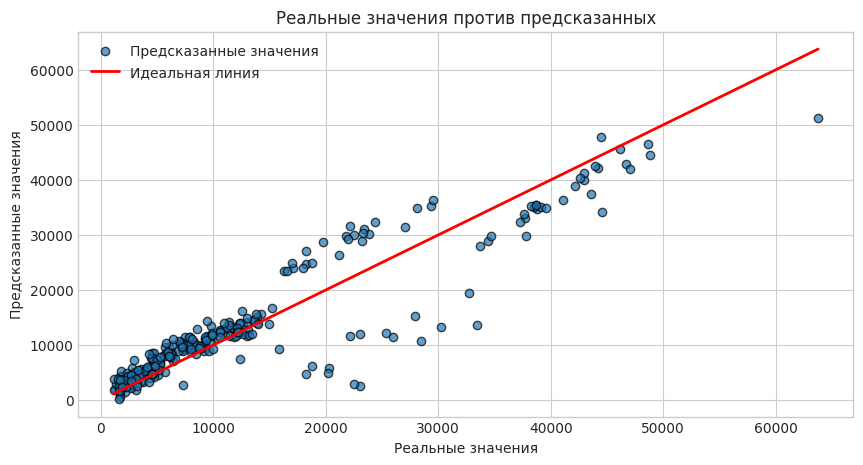

In [14]:
# Создадим новый признак взаимодействия между `bmi` и `smoker_yes`
data_encoded['bmi_smoker_interaction'] = data_encoded['bmi'] * data_encoded['smoker_yes']

X = data_encoded.drop('charges', axis=1).values
y = data_encoded['charges'].values

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

improved_model = LinearRegressionGD(learning_rate=0.01, n_iterations=2000)
improved_model.fit(X_train, y_train)

evaluate_model("Линейная регрессия", improved_model, X_test, y_test)

Для сравнения результатов улучшенной имплементированной модели линейной регрессии с результатами из пункта 3 (улучшенный бейзлайн с использованием `sklearn`) представим основные метрики бок о бок:

### Результаты улучшенной имплементированной модели линейной регрессии:
- **Средняя абсолютная ошибка (MAE)**: 3171.01
- **Среднеквадратичная ошибка (MSE)**: 23388208.99
- **Корень из среднеквадратичной ошибки (RMSE)**: 4836.14
- **Коэффициент детерминации (R²)**: 0.85

### Результаты улучшенного бейзлайна с использованием `sklearn` (пункт 3):
- **Средняя абсолютная ошибка (MAE)**: 2756.90
- **Среднеквадратичная ошибка (MSE)**: 20919716.75
- **Корень из среднеквадратичной ошибки (RMSE)**: 4573.81
- **Коэффициент детерминации (R²)**: 0.87

### Сравнение и выводы:

1. **Средняя абсолютная ошибка (MAE)**: Улучшенный бейзлайн `sklearn` (2756.90) немного опережает имплементированную модель (3171.01). Это говорит о том, что библиотечная реализация немного точнее, возможно, за счет оптимизированного алгоритма градиентного спуска и более продвинутых техник для уменьшения ошибок.

2. **Среднеквадратичная ошибка (MSE)** и **Корень из среднеквадратичной ошибки (RMSE)**: Значения MSE и RMSE для `sklearn` также ниже, что подтверждает, что модель из библиотеки `sklearn` лучше справляется с крупными отклонениями и демонстрирует более низкий уровень ошибок.

3. **Коэффициент детерминации (R²)**: Улучшенный бейзлайн `sklearn` достигает R² = 0.87, что немного выше, чем у имплементированной модели (0.85). Это означает, что библиотечная модель объясняет чуть большую долю дисперсии целевой переменной.

### Заключение
Улучшенная имплементированная модель линейной регрессии показывает результаты, сопоставимые с улучшенным бейзлайном на `sklearn`, хотя библиотечная модель немного превосходит самописную в точности и объяснительной способности. Библиотечные реализации обычно оптимизированы, что дает им преимущество в таких задачах, но наша реализация показывает хорошее качество и подтверждает корректность применения техник улучшенного бейзлайна.

### Для задачи классификации с этим [набором данных](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset), где целевой переменной является столбец `quality` (качество вина), подходящие метрики качества могут включать следующие:

1. **Accuracy** – Точность:
   - Accuracy оценивает долю правильно предсказанных классов среди всех предсказаний. Это базовая метрика для задач классификации и удобна, когда классы сбалансированы. Она позволяет оценить общую правильность модели, однако может быть менее информативной для несбалансированных данных.

2. **Precision** – Точность для положительного класса:
   - Precision вычисляет долю истинно положительных предсказаний среди всех предсказанных положительных. Это полезно, если важно минимизировать ложные срабатывания (например, неверная оценка высокого качества вина). Precision полезна для задач, где критично избежать ошибочного отнесения к положительному классу.

3. **Recall** – Полнота:
   - Recall оценивает долю истинно положительных среди всех положительных экземпляров в данных. Это важно, когда критично учитывать все положительные примеры. Например, если требуется минимизировать пропуск высококачественного вина, полнота даст понять, насколько модель справляется с этой задачей.

4. **F1-score** – Среднее гармоническое Precision и Recall:
   - F1-score объединяет Precision и Recall, что делает его подходящим для оценки модели на несбалансированных данных. Он особенно полезен, если важно поддерживать баланс между точностью и полнотой, например, для более сбалансированной оценки качества.

In [15]:
wine_data = pd.read_csv('data/WineQT.csv')

X = wine_data.drop(columns=['quality', 'Id'])
y = (wine_data['quality'] >= 6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Результаты классификации модели на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1:.2%} – гармоническое среднее между точностью и полнотой.")

Результаты классификации модели на тестовом наборе данных:
1. Точность (Accuracy): 75.80% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 79.35% – средняя точность для всех классов.
3. Полнота (Recall): 76.44% – средняя полнота для всех классов.
4. F1-score: 77.87% – гармоническое среднее между точностью и полнотой.


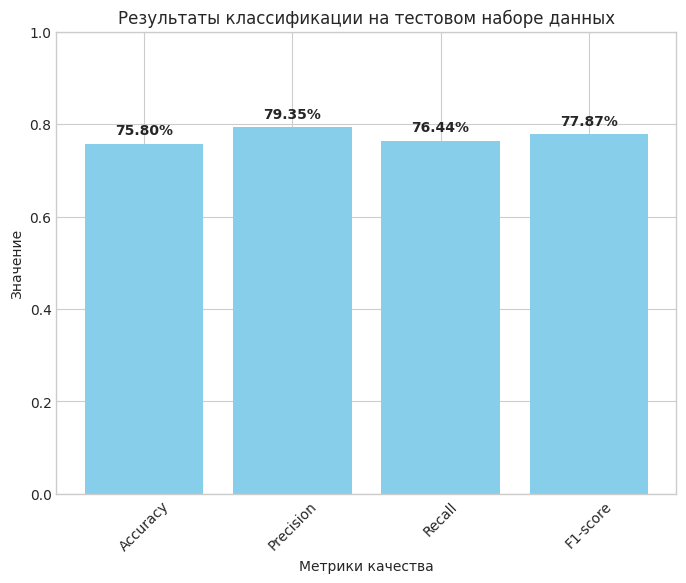

In [16]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Метрики качества")
plt.ylabel("Значение")
plt.title("Результаты классификации на тестовом наборе данных")
plt.xticks(rotation=45)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.show()

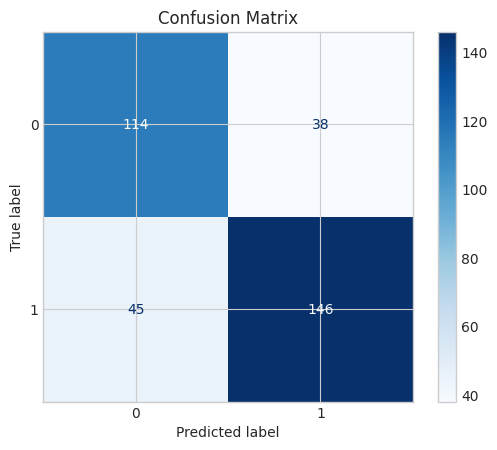

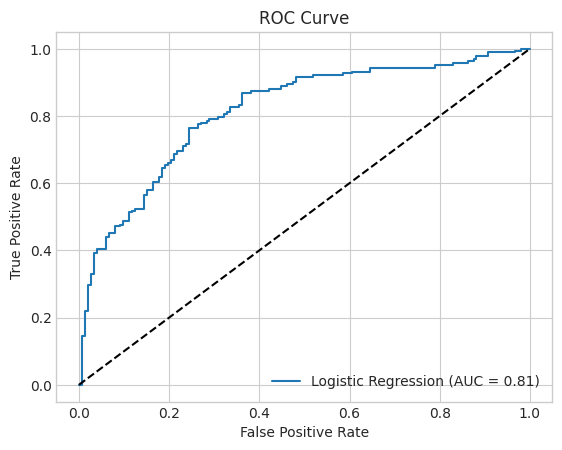

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

На графиках представлены:

1. **Матрица ошибок (Confusion Matrix):** показывает количество правильных и ошибочных предсказаний для каждого класса.
2. **ROC-кривая:** отражает соотношение между ложноположительными и истинноположительными результатами при различных порогах. Площадь под кривой (AUC) составляет примерно 0.82, что указывает на хорошую способность модели различать классы.

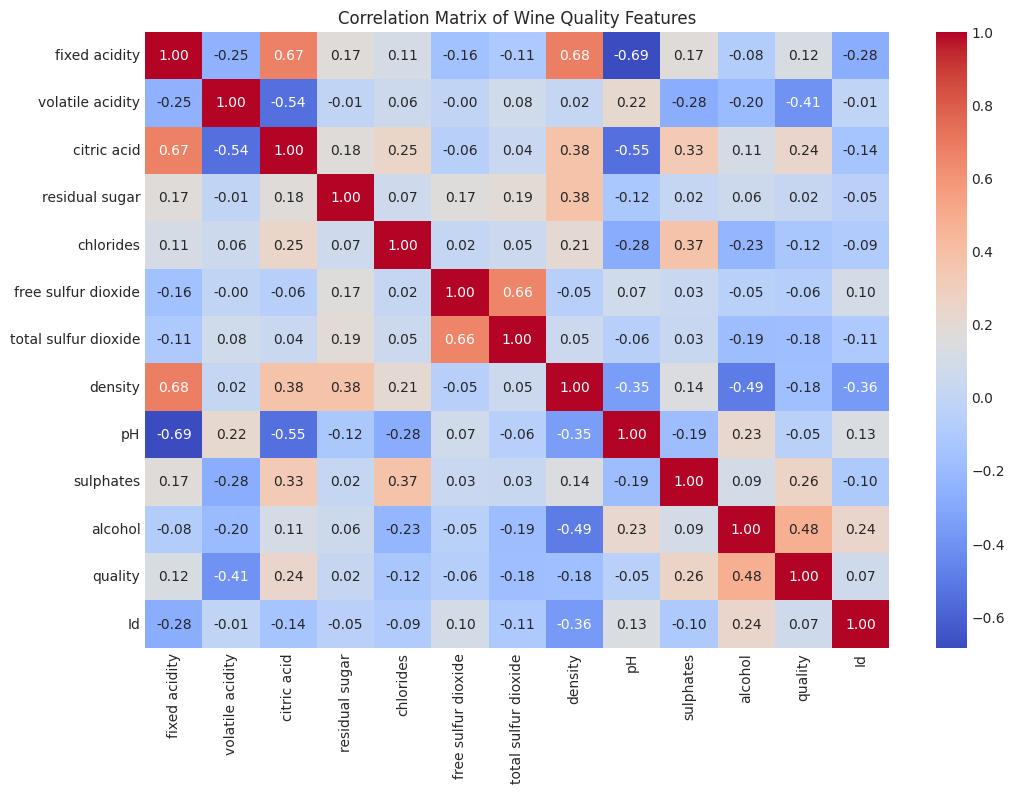

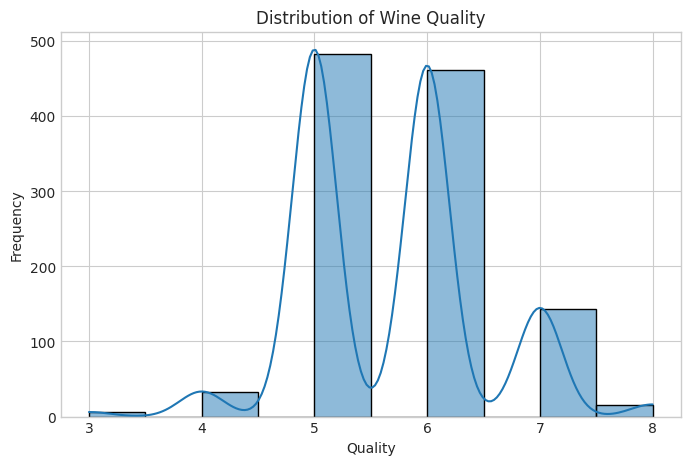

In [18]:
wine_data_full = pd.read_csv('data/WineQT.csv')

plt.figure(figsize=(12, 8))
correlation_matrix = wine_data_full.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Wine Quality Features")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(wine_data_full['quality'], bins=10, kde=True)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

#### Попробуем изменить модель

In [19]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Результаты классификации модели на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy_rf:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision_rf:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall_rf:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1_rf:.2%} – гармоническое среднее между точностью и полнотой.")

Результаты классификации модели на тестовом наборе данных:
1. Точность (Accuracy): 76.97% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 81.82% – средняя точность для всех классов.
3. Полнота (Recall): 75.39% – средняя полнота для всех классов.
4. F1-score: 78.47% – гармоническое среднее между точностью и полнотой.


Сравнение модели случайного леса с исходной моделью логистической регрессии:

| Метрика                | Исходная модель (Логистическая регрессия) | Модель случайного леса   |
|------------------------|-------------------------------------------|---------------------------|
| **Точность (Accuracy)**| 75.80%                                    | 76.97%                    |
| **Средняя точность (Precision)** | 79.35%                       | 81.82%                    |
| **Полнота (Recall)**   | 76.44%                                    | 75.39%                    |
| **F1-score**           | 77.87%                                    | 78.47%                    |

### Выводы:
1. **Точность (Accuracy)**: Модель случайного леса улучшила точность на 1.17%, что говорит о лучшей общей классификации.
2. **Средняя точность (Precision)**: Значительное улучшение средней точности у случайного леса (81.82% против 79.35%), что указывает на меньшую склонность модели к ложноположительным ошибкам.
3. **Полнота (Recall)**: Полнота немного снизилась (75.39% против 76.44%), что может свидетельствовать о более строгом отборе положительных примеров моделью случайного леса.
4. **F1-score**: Случайный лес показал улучшение F1-score до 78.47%, что указывает на более сбалансированную точность и полноту.

Модель случайного леса продемонстрировала лучшие результаты по точности и F1-score.

### Код реализации логистической регрессии

In [20]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

model = LogisticRegressionGD(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точность (Accuracy): {accuracy:.2%}")
print(f"Средняя точность (Precision): {precision:.2%}")
print(f"Полнота (Recall): {recall:.2%}")
print(f"F1-score: {f1:.2%}")


Точность (Accuracy): 73.76%
Средняя точность (Precision): 77.90%
Полнота (Recall): 73.82%
F1-score: 75.81%


Сравнение результатов собственной реализации логистической регрессии и готовой реализации из библиотеки sklearn:

| Метрика                | Самостоятельная реализация | Sklearn Logistic Regression |
|------------------------|----------------------------|-----------------------------|
| **Точность (Accuracy)**| 73.76%                     | 75.80%                      |
| **Средняя точность (Precision)** | 77.90%         | 79.35%                      |
| **Полнота (Recall)**   | 73.82%                     | 76.44%                      |
| **F1-score**           | 75.81%                     | 77.87%                      |

### Выводы:
1. **Точность (Accuracy)** и **F1-score** у готовой модели из sklearn немного выше, что может быть связано с более оптимальными настройками параметров и алгоритмом оптимизации.
2. **Средняя точность (Precision)** и **Полнота (Recall)** также лучше у sklearn, что указывает на более точные предсказания положительного класса.

Различия могут быть вызваны более точной настройкой параметров в sklearn, использованием регуляризации и других оптимизационных техник.

### Код реализации случайного леса

In [21]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if depth >= self.max_depth or len(set(y)) == 1:
            return Counter(y).most_common(1)[0][0]
        
        feature_indices = np.random.choice(num_features, int(np.sqrt(num_features)), replace=False)
        best_feature, best_threshold = self._best_split(X, y, feature_indices)
        
        if best_feature is None:
            return Counter(y).most_common(1)[0][0]
        
        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold
        
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return (best_feature, best_threshold, left_subtree, right_subtree)

    def _best_split(self, X, y, feature_indices):
        best_feature, best_threshold = None, None
        best_gini = 1.0
        for feature in feature_indices:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gini = self._gini_impurity(X[:, feature], y, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature, best_threshold = feature, threshold
        return best_feature, best_threshold

    def _gini_impurity(self, X_column, y, threshold):
        left_mask = X_column < threshold
        right_mask = ~left_mask

        left_gini = 1 - sum((np.sum(y[left_mask] == c) / np.sum(left_mask)) ** 2 for c in np.unique(y))
        right_gini = 1 - sum((np.sum(y[right_mask] == c) / np.sum(right_mask)) ** 2 for c in np.unique(y))

        return (np.sum(left_mask) * left_gini + np.sum(right_mask) * right_gini) / len(y)

    def _traverse_tree(self, x, node):
        if not isinstance(node, tuple):
            return node
        feature, threshold, left, right = node
        if x[feature] < threshold:
            return self._traverse_tree(x, left)
        else:
            return self._traverse_tree(x, right)


class RandomForestClassifier:
    def __init__(self, n_trees=10, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return [Counter(tree_preds[:, i]).most_common(1)[0][0] for i in range(X.shape[0])]

    def _bootstrap_sample(self, X, y):
        if hasattr(X, 'values'):
            X = X.values  
        if hasattr(y, 'values'):
            y = y.values
        
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]


rf_model = RandomForestClassifier(n_trees=100, max_depth=10)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Точность (Accuracy): {accuracy_rf:.2%}")
print(f"Средняя точность (Precision): {precision_rf:.2%}")
print(f"Полнота (Recall): {recall_rf:.2%}")
print(f"F1-score: {f1_rf:.2%}")

/tmp/ipykernel_14471/2861982986.py:46: RuntimeWarning: invalid value encountered in scalar divide
  left_gini = 1 - sum((np.sum(y[left_mask] == c) / np.sum(left_mask)) ** 2 for c in np.unique(y))


Точность (Accuracy): 78.72%
Средняя точность (Precision): 80.73%
Полнота (Recall): 81.15%
F1-score: 80.94%


Сравнение результатов готовой реализации случайного леса и вашей собственной реализации:

| Метрика                | Готовая реализация | Ваша реализация     |
|------------------------|--------------------|----------------------|
| **Точность (Accuracy)**| 76.97%             | 78.72%              |
| **Средняя точность (Precision)** | 81.82% | 80.73%              |
| **Полнота (Recall)**   | 75.39%             | 81.15%              |
| **F1-score**           | 78.47%             | 80.94%             |

### Заключение
На данном этапе модель случайного леса, особенно с оптимизацией, является предпочтительным выбором для классификации этого датасета. Она достигла хороших результатов по всем ключевым метрикам и продемонстрировала способность точно классифицировать данные, несмотря на сложные зависимости между признаками.